# DIAMOND PRICE PREDICTION

<img src="https://storage.googleapis.com/kaggle-datasets-images/1312/2368/23808724f313005d570be372003594fa/dataset-cover.jpg" alt="Dataset Cover">

* Bu projede, elmas fiyatlarını etkileyen faktörleri analiz edip Regression modeli geliştireceğiz. Kullanılan veri setinde, her bir elmasın özelliklerini temsil eden çeşitli değişkenler bulunmaktadır: karat (carat), kesim (cut), renk (color), berraklık (clarity), derinlik (depth), genişlik alanı (table) ve boyutlar (x, y, z). Hedef değişken olarak elmasın fiyatı (price) seçilmiştir. Regresyon analizi, elmasın fiyatını belirleyen bu özellikler arasındaki ilişkileri ortaya koymayı amaçlamaktadır. Elde edilen model, elmas fiyatlarının tahmin edilmesinde kullanılabilecek değerli bir araç sunmakta ve potansiyel alıcılar ile satıcılar için fiyat belirleme süreçlerinde yardımcı olmaktadır. 

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

## EDA

In [2]:
df=pd.read_csv("diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
del df["Unnamed: 0"]

In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [9]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

* D
* E
* F
* G
* H
* I
* J
* 
Bu sıralama, elmasın renk kalitesini belirler; D en yüksek kaliteyi temsil ederken, J en düşük kaliteyi temsil eder. Renk derecelendirmesi, elmasın değerini etkileyen önemli bir faktördür. rakama çevirirkende bunu gözönünde bulunduracağım

In [10]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [11]:
df["price"].unique()

array([ 326,  327,  334, ..., 2753, 2755, 2756], dtype=int64)

* Elmasın berraklık derecelendirmesi (clarity), iç ve dış kusurların sayısını ve görünürlüğünü belirler. Hiyerarşik sıralama şu şekildedir, rakama çevirirken bunu göz önünde bulunduracağım.

In [12]:
df["cut"].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

## DATA VISUALIZATION

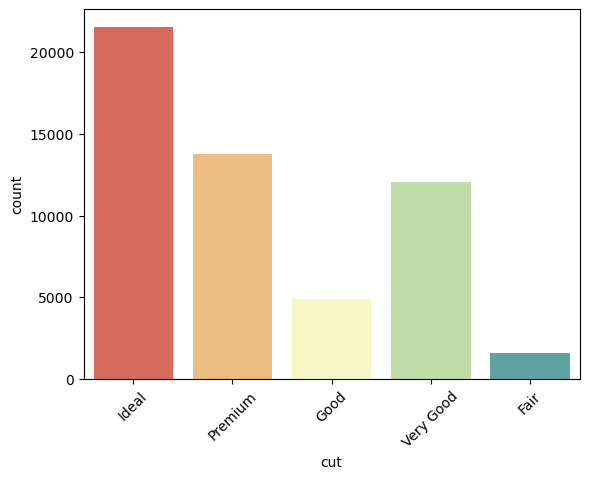

In [13]:
sns.countplot(x=df['cut'], hue=df['cut'], palette='Spectral')
plt.xticks(rotation=45);

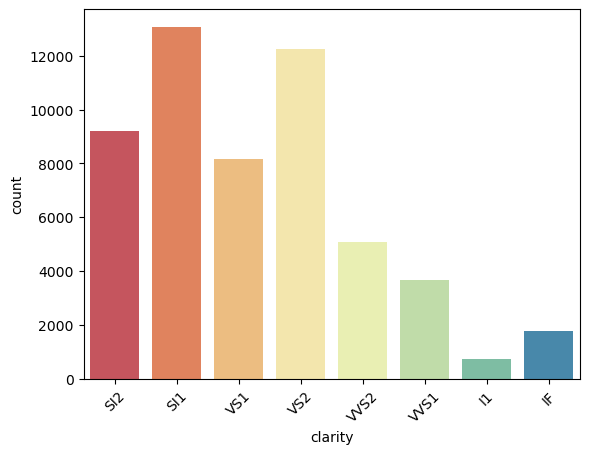

In [14]:
sns.countplot(x=df['clarity'], hue=df['clarity'], palette='Spectral')
plt.xticks(rotation=45);
# elmasın kusurlarını gösteren grafik
# IF hiç kusursuz, I1 belirgin kusurlu demek, bunlar azınlıkta, datadaki çoğu elmaslar az kusurlu 

<Axes: ylabel='count'>

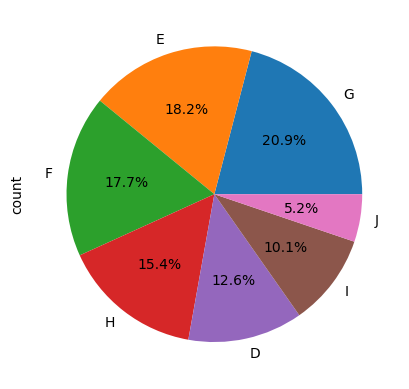

In [15]:
df['color'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='cut', ylabel='count'>

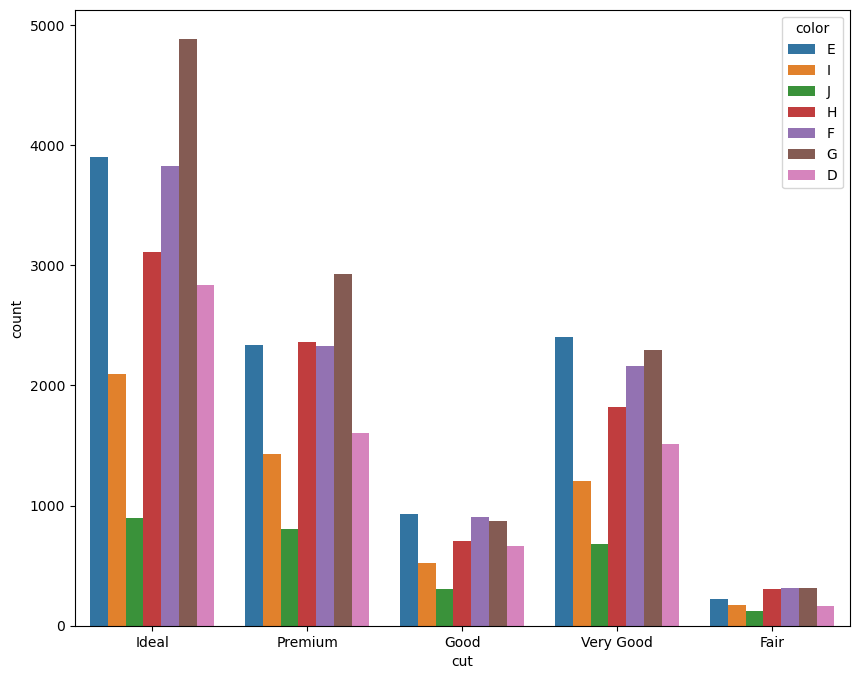

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x=df['cut'],hue=df['color'])
# iyi kesimli elmasların renk kalitesi de yüksek

### FEATURE ENGINEERING

In [17]:
df.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


* burada x y z sutunları elmasın genişliği, derinliği ve yüksekliğini ifade eder ,modelleme yaparken önemli bir unsurdur, tabloda da gördüğümüz gibi price ile arasında lineer bir corelasyon var yani genişlik, yükseklik ve derinlik arttıkça fiyatta artıyor. 

In [18]:
d={'Ideal':0,'Premium':1,'Very Good':2,'Good':3,'Fair':4,}

In [19]:
df['cut']=df['cut'].map(d)

In [20]:
d={'IF':0,'VVS1':1,'VVS2':2,'VS1':3,'VS2':4,'SI1':5, 'SI2':6, '2I1':7,}

In [21]:
df['clarity']=df['clarity'].map(d)

In [22]:
d={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5, 'J':6,}

In [23]:
df['color']=df['color'].map(d)

In [24]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,6.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,5.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,4.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,6.0,63.3,58.0,335,4.34,4.35,2.75


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53199 non-null  float64
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 4.1 MB


* OUTLIERS

<Axes: xlabel='color', ylabel='Density'>

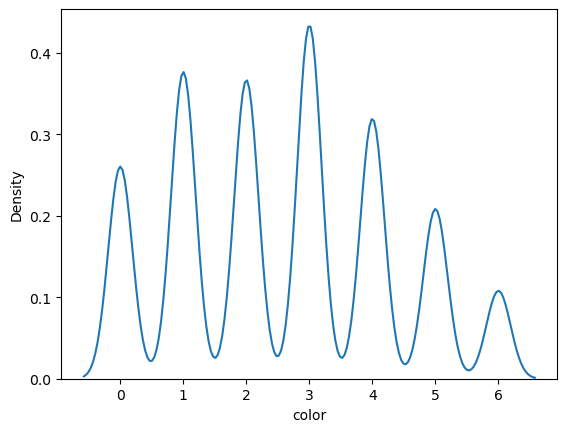

In [26]:
sns.kdeplot(x=df['color'])

<Axes: xlabel='clarity', ylabel='Density'>

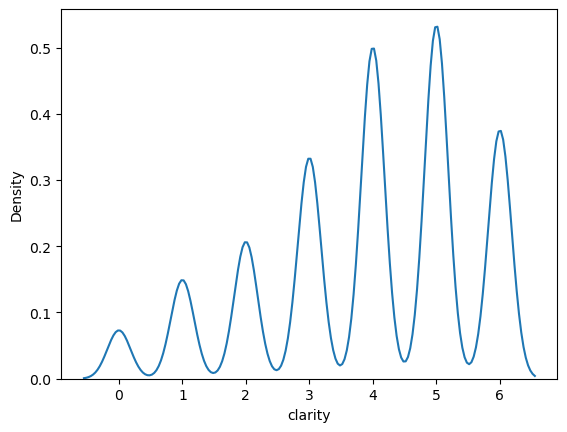

In [27]:
sns.kdeplot(x=df['clarity'])
# data sola doğru uzamış2 den küçükleri keseceğim

In [28]:
df=df[df['clarity']>2]

<Axes: xlabel='clarity', ylabel='Density'>

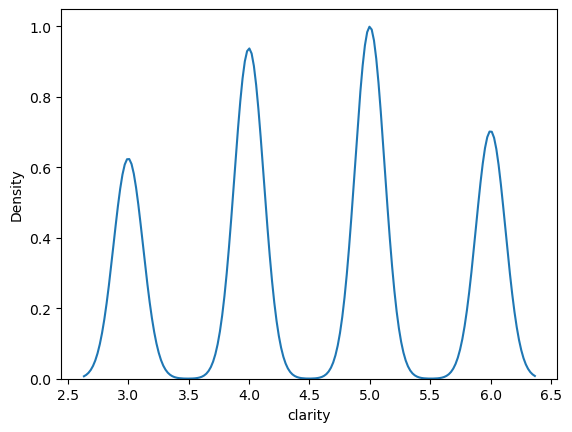

In [29]:
sns.kdeplot(x=df['clarity'])
# şimdi iyi oldu

<Axes: xlabel='cut', ylabel='Density'>

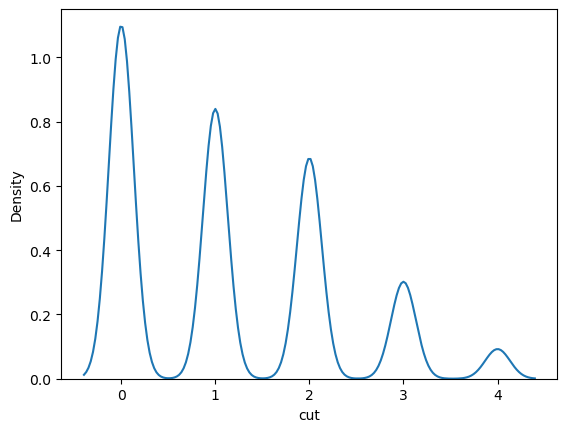

In [30]:
sns.kdeplot(x=df['cut'])

In [31]:
df=df[df['cut']<4]

<Axes: xlabel='cut', ylabel='Density'>

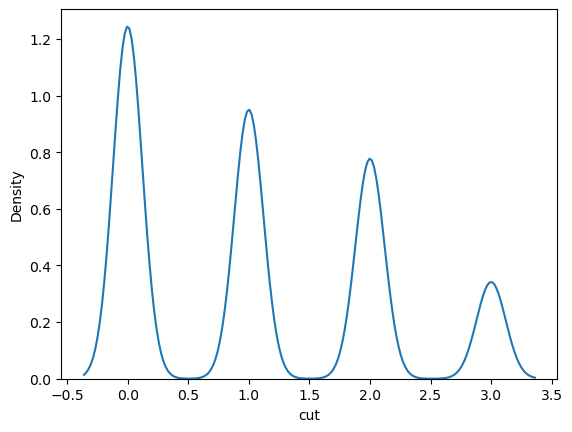

In [32]:
sns.kdeplot(x=df['cut'])

<Axes: >

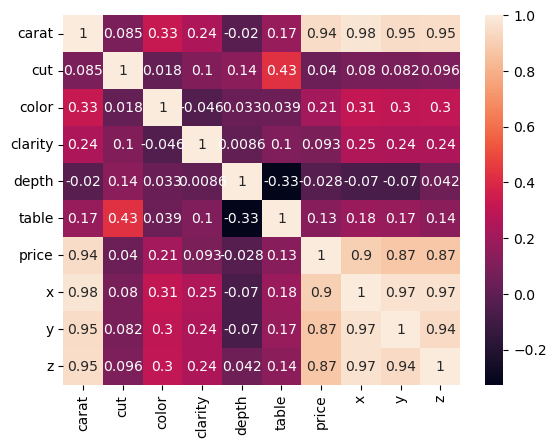

In [33]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [34]:
abs(df.corr(numeric_only=True)['price']).sort_values(ascending=True)
# table ve depth sutunlarında corelasyon düşük görünse bile bunlar elmasın fiyatında önemli rol oynayan faktörlerdir, bu yüzden silmeyeceğim

depth      0.027520
cut        0.039762
clarity    0.092994
table      0.128142
color      0.213607
y          0.871152
z          0.872081
x          0.898158
carat      0.943224
price      1.000000
Name: price, dtype: float64

In [35]:
x = df[[ 'cut', 'carat', 'color',
       'clarity', 'depth', 'table',
       'y', 'x', 'z']]
y = df['price']
#x = pd.get_dummies(x,drop_first=True)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.20, random_state=42)

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def algo_test(x, y):
    L = LinearRegression()
    R = Ridge()
    Lass = Lasso()
    E = ElasticNet()
    sgd = SGDRegressor()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    kn = KNeighborsRegressor()
    ada = AdaBoostRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()
    svr = SVR()
    mlp_regressor = MLPRegressor()

    algos = [L, R, Lass, E, sgd, ETR, GBR, ada, kn, dt, xgb, svr, mlp_regressor]
    algo_names = ['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'SGD', 'Extra Tree', 'Gradient Boosting',
                  'KNeighborsRegressor', 'AdaBoost', 'Decision Tree', 'XGBRegressor', 'SVR', 'mlp_regressor']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=42)

    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns=['R_Squared', 'RMSE', 'MAE'], index=algo_names)

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        r_squared.append(r2_score(y_test, p))
        rmse.append(mean_squared_error(y_test, p) ** .5)
        mae.append(mean_absolute_error(y_test, p))
        
        # Katsayıları alma
        if hasattr(algo, 'coef_'):  # Linear, Ridge, Lasso, ElasticNet, SGDRegressor, MLPRegressor
            coefficients = algo.coef_
            print(f"{algo.__class__.__name__} Coefficients: {coefficients}")
        elif hasattr(algo, 'feature_importances_'):  # XGBRegressor, Extra Trees, Gradient Boosting
            feature_importances = algo.feature_importances_
            print(f"{algo.__class__.__name__} Feature Importances: {feature_importances}")

    # Sonuçları tabloya ekleme
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
        
    # Sonuç tablosunu doğruluk oranına (R²) göre sıralayıp döndürme
    rtable = result.sort_values('R_Squared', ascending=False)
    return rtable

# Fonksiyonu çağırma (X ve y veri setinizi burada kullanın)
# rtable = algo_test(X, y)

In [38]:
algo_test(x,y)

LinearRegression Coefficients: [  -71.31965363 12930.38796296  -302.08604721  -588.2639735
  -100.44502347   -41.41465955    71.18495421 -1901.76431752
   -27.00860944]
Ridge Coefficients: [  -71.37661232 12888.39623151  -301.78218148  -588.30753135
   -99.58158555   -41.3290829     69.42900855 -1881.8871221
   -27.99892869]
Lasso Coefficients: [-7.01723836e+01  1.27913635e+04 -3.00812045e+02 -5.87860031e+02
 -9.86291984e+01 -4.13372707e+01 -0.00000000e+00 -1.78495117e+03
 -7.13212260e+00]
ElasticNet Coefficients: [ -67.10363051  713.13514468  -71.92120234 -287.96824796   44.27815479
   13.78898843 1085.34623255 1137.93860413  654.93307194]
SGDRegressor Coefficients: [ 1.82608080e+07  1.45323759e+08 -1.68689243e+05 -1.11649938e+05
 -3.50799333e+07 -1.62962895e+07 -1.85058656e+07 -7.52548774e+07
  5.56675433e+07]
ExtraTreeRegressor Feature Importances: [0.0022542  0.6716853  0.02922545 0.03106547 0.00298677 0.00307437
 0.01541821 0.23562129 0.00866895]
GradientBoostingRegressor Feature 

,R_Squared,RMSE,MAE
XGBRegressor,9.817539e-01,5.571868e+02,2.895855e+02
Gradient Boosting,9.789701e-01,5.981833e+02,3.325480e+02
Decision Tree,9.645869e-01,7.762436e+02,3.768564e+02
Extra Tree,9.631980e-01,7.913194e+02,3.861833e+02
AdaBoost,9.588308e-01,8.369554e+02,4.732402e+02
KNeighborsRegressor,9.435588e-01,9.799729e+02,7.430708e+02
Lasso,9.355283e-01,1.047371e+03,6.853969e+02
Ridge,9.353087e-01,1.049153e+03,6.851762e+02
Linear,9.353021e-01,1.049207e+03,6.848258e+02
mlp_regressor,9.320576e-01,1.075193e+03,5.001765e+02


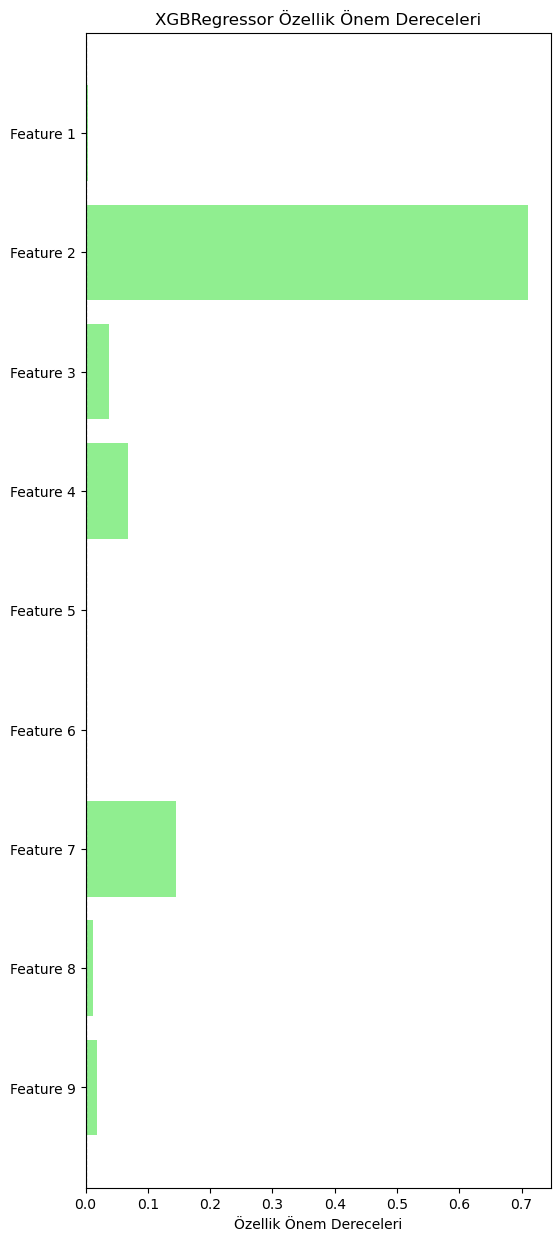

In [41]:
xgb_importances = [0.00345435, 0.71115905, 0.03692409, 0.06812057, 
                   0.00236624, 0.00204705, 0.14585836, 0.01228892, 
                   0.01778134]

feature_names = [f'Feature {i+1}' for i in range(len(xgb_importances))]

# DataFrame oluşturma
coefficients = {
    'Feature': feature_names,
    'Importance': xgb_importances
}

feature_importance = pd.DataFrame(coefficients)
# grafik
plt.figure(figsize=(6, 15))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightgreen')
plt.gca().invert_yaxis()  # Y eksenini ters çevir
plt.xlabel('Özellik Önem Dereceleri')
plt.title('XGBRegressor Özellik Önem Dereceleri')
plt.axvline(0, color='black', linewidth=0.8, ls='--')  # Sıfır çizgisi
plt.show()

* Modeli xgb ile %81 başarı gösterdi, coef baktığımızda fiyata etki eden sutunlar 2.sutun yani "carat" sonra 7.sutun yani "y" bu elmasın genişliği demek, elmasın genişliği ne kadar çok olurs afiyati da tabi artar, sonra 4. sutun yani "clarity" berraklığı, en son da 3. sutun yani "color" rengi.